In [79]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn import svm
from sklearn.metrics import accuracy_score

In [80]:
data = pd.read_csv('bipartition.txt', sep='\t', header=None)

In [81]:
x, y = data[[0,1]], data[2]

## 定义分类器参数

In [82]:
clf_param = (('linear', 0.1), ('linear', 0.5), ('linear', 1), ('linear', 2),
            ('rbf', 1, 0.1), ('rbf', 1, 1), ('rbf', 1, 10), ('rbf', 1, 100),
            ('rbf', 5, 0.1), ('rbf', 5, 1), ('rbf', 5, 10), ('rbf', 5, 100))

## 测试集创建

In [83]:
x1_min, x2_min = np.min(x, axis=0)
x1_max, x2_max = np.max(x, axis=0)
x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]
grid_test = np.stack((x1.flat, x2.flat), axis=1)

## 绘图前置参数

In [84]:
cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FFA0A0'])
cm_dark = mpl.colors.ListedColormap(['g', 'r'])
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

## 利用预设超参，一个个试（考虑：是否可以使用gridSearch）

准确率： 0.7
线性核，C=0.1
准确率： 0.73
线性核，C=0.5
准确率： 0.73
线性核，C=1.0
准确率： 0.73
线性核，C=2.0
准确率： 0.73
高斯核，C=1.0，$\gamma$ =0.1
准确率： 0.74
高斯核，C=1.0，$\gamma$ =1.0
准确率： 0.76
高斯核，C=1.0，$\gamma$ =10.0
准确率： 0.88
高斯核，C=1.0，$\gamma$ =100.0
准确率： 0.73
高斯核，C=5.0，$\gamma$ =0.1
准确率： 0.71
高斯核，C=5.0，$\gamma$ =1.0
准确率： 0.8
高斯核，C=5.0，$\gamma$ =10.0
准确率： 0.89
高斯核，C=5.0，$\gamma$ =100.0


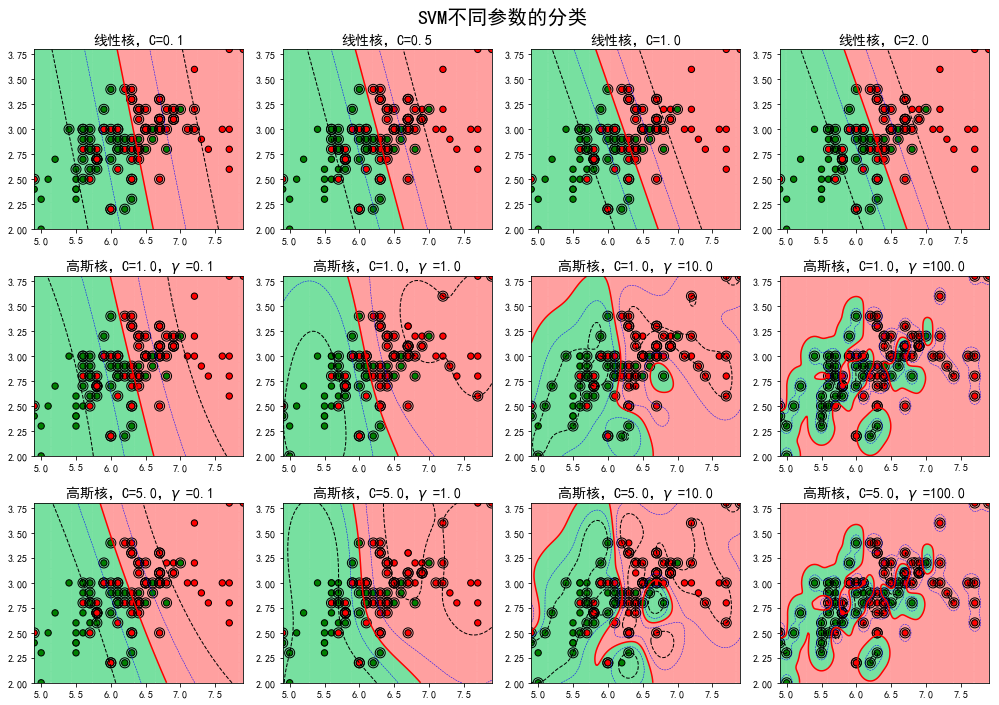

In [85]:
plt.figure(figsize=(14, 10), facecolor='w')
for i, param in enumerate(clf_param):
    clf = svm.SVC(C=param[1], kernel=param[0])
    if param[0] == 'rbf':
        clf.gamma = param[2]
        title = u'高斯核，C=%.1f，$\gamma$ =%.1f' % (param[1], param[2])
    else:
        title = u'线性核，C=%.1f' % param[1]
    
    clf.fit(x, y)
    y_hat = clf.predict(x)
    print u'准确率：', accuracy_score(y, y_hat)
    
    #绘图
    print title
#     print u'支撑向量的数目：', clf.n_support_
#     print u'支撑向量系数：', clf.dual_coef_
#     print u'支撑向量: ', clf.support_
    
    plt.subplot(3, 4, i+1)
    grid_hat = clf.predict(grid_test)
    grid_hat = grid_hat.reshape(x1.shape)
    
    plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light, alpha=0.8)
    plt.scatter(x[0], x[1], c=y, edgecolors='k', s=40, cmap=cm_dark)
    plt.scatter(x.loc[clf.support_, 0], x.loc[clf.support_, 1], \
               edgecolors='k', facecolors='none', s=100, marker='o')
    z = clf.decision_function(grid_test)
#     print u'clf.decision_function(x) =', clf.decision_function(x)
#     print u'clf.predict(x) =', clf.predict(x)
    z = z.reshape(x1.shape)
    plt.contour(x1, x2, z, colors=list('kbrbk'), linestyles=['--', '--', \
               '-', '--', '--'], linewidths=[1, 0.5, 1.5, 0.5, 1], \
               levels=[-1, -0.5, 0, 0.5, 1])
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.title(title, fontsize=14)
plt.suptitle(u'SVM不同参数的分类', fontsize=20)
plt.tight_layout(1.4)
plt.subplots_adjust(top=0.92)
plt.show()